In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import xarray as xr
import pygrib
import cartopy as cp

In [2]:
import glob
files = glob.glob("MRMS_data_2019_05_16/*-20*.grib2")
files.sort()

file_list = []
for file in files:
     file_list.append(xr.open_dataset(file))
ds = xr.concat(file_list, dim="valid_time")
ds

<xarray.Dataset>
Dimensions:         (latitude: 3500, longitude: 7000, valid_time: 30)
Coordinates:
    time            (valid_time) datetime64[ns] 2019-05-16T20:00:00 ... 2019-...
    step            timedelta64[ns] 00:00:00
    heightAboveSea  float64 500.0
  * latitude        (latitude) float64 54.99 54.98 54.98 ... 20.03 20.02 20.01
  * longitude       (longitude) float64 230.0 230.0 230.0 ... 300.0 300.0 300.0
  * valid_time      (valid_time) datetime64[ns] 2019-05-16T20:00:00 ... 2019-...
Data variables:
    unknown         (valid_time, latitude, longitude) float32 -3.0 -3.0 ... -3.0
Attributes:
    GRIB_edition:            2
    GRIB_centre:             161
    GRIB_centreDescription:  161
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             161
    history:                 2021-06-16T19:16 GRIB to CDM+CF via cfgrib-0.9.9...

In [3]:
extent_data = [230,300,55,20]
extent_us_zoom = [230,300,49,20]
extent_midwest_zoom = [265,280,45,35]
states_provinces = cp.feature.NaturalEarthFeature(category='cultural',name='admin_1_states_provinces_lines',scale='50m',facecolor='none')

In [4]:
mesh = ds.unknown

In [5]:
mesh_10_max = mesh.coarsen(valid_time=5).max()
mesh_10_avg = mesh.coarsen(valid_time=5).mean()
mesh_10_tot = mesh.coarsen(valid_time=5).sum()
mesh_10_min = mesh.coarsen(valid_time=5).min()

mesh_30_max = mesh.coarsen(valid_time=15).max()
mesh_30_avg = mesh.coarsen(valid_time=15).mean()
mesh_30_tot = mesh.coarsen(valid_time=15).sum()
mesh_30_min = mesh.coarsen(valid_time=15).min()

mesh_60_max = mesh.coarsen(valid_time=30).max()
mesh_60_avg = mesh.coarsen(valid_time=30).mean()
mesh_60_tot = mesh.coarsen(valid_time=30).sum()
mesh_60_min = mesh.coarsen(valid_time=30).min()
mesh_10_max

<xarray.DataArray 'unknown' (valid_time: 6, latitude: 3500, longitude: 7000)>
array([[[-3., -3., -3., ..., -3., -3., -3.],
        [-3., -3., -3., ..., -3., -3., -3.],
        [-3., -3., -3., ..., -3., -3., -3.],
        ...,
        [-3., -3., -3., ..., -3., -3., -3.],
        [-3., -3., -3., ..., -3., -3., -3.],
        [-3., -3., -3., ..., -3., -3., -3.]],

       [[-3., -3., -3., ..., -3., -3., -3.],
        [-3., -3., -3., ..., -3., -3., -3.],
        [-3., -3., -3., ..., -3., -3., -3.],
        ...,
        [-3., -3., -3., ..., -3., -3., -3.],
        [-3., -3., -3., ..., -3., -3., -3.],
        [-3., -3., -3., ..., -3., -3., -3.]],

       [[-3., -3., -3., ..., -3., -3., -3.],
        [-3., -3., -3., ..., -3., -3., -3.],
        [-3., -3., -3., ..., -3., -3., -3.],
        ...,
...
        ...,
        [-3., -3., -3., ..., -3., -3., -3.],
        [-3., -3., -3., ..., -3., -3., -3.],
        [-3., -3., -3., ..., -3., -3., -3.]],

       [[-3., -3., -3., ..., -3., -3., -3.],
        [-3., -3., -3., ..., -3., -3., -3.],
        [-3., -3., -3., ..., -3., -3., -3.],
        ...,
        [-3., -3., -3., ..., -3., -3., -3.],
        [-3., -3., -3., ..., -3., -3., -3.],
        [-3., -3., -3., ..., -3., -3., -3.]],

       [[-3., -3., -3., ..., -3., -3., -3.],
        [-3., -3., -3., ..., -3., -3., -3.],
        [-3., -3., -3., ..., -3., -3., -3.],
        ...,
        [-3., -3., -3., ..., -3., -3., -3.],
        [-3., -3., -3., ..., -3., -3., -3.],
        [-3., -3., -3., ..., -3., -3., -3.]]], dtype=float32)
Coordinates:
    time            (valid_time) datetime64[ns] 2019-05-16T20:04:00 ... 2019-...
    step            timedelta64[ns] 00:00:00
    heightAboveSea  float64 500.0
  * latitude        (latitude) float64 54.99 54.98 54.98 ... 20.03 20.02 20.01
  * longitude       (longitude) float64 230.0 230.0 230.0 ... 300.0 300.0 300.0
  * valid_time      (valid_time) datetime64[ns] 2019-05-16T20:04:00 ... 2019-...
Attributes: (12/29)
    GRIB_paramId:                             0
    GRIB_dataType:                            ra
    GRIB_numberOfPoints:                      24500000
    GRIB_typeOfLevel:                         heightAboveSea
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_name:                                unknown
    GRIB_shortName:                           unknown
    GRIB_units:                               unknown
    long_name:                                unknown
    units:                                    unknown
    standard_name:                            unknown

In [6]:
timestring_10 = ['2000 UTC - 2010 UTC', '2010 UTC - 2020 UTC', '2020 UTC - 2030 UTC', '2030 UTC - 2040 UTC', '2040 UTC - 2050 UTC', '2050 UTC - 2100 UTC']
timestring_30 = ['2000 UTC - 2030 UTC', '2030 UTC - 2100 UTC']
timestring_60 = ['2000 UTC - 2100 UTC']

In [7]:
#mesh_60_max

## 60-Minute Aggregation

#### Plot 60 Minute Maximum

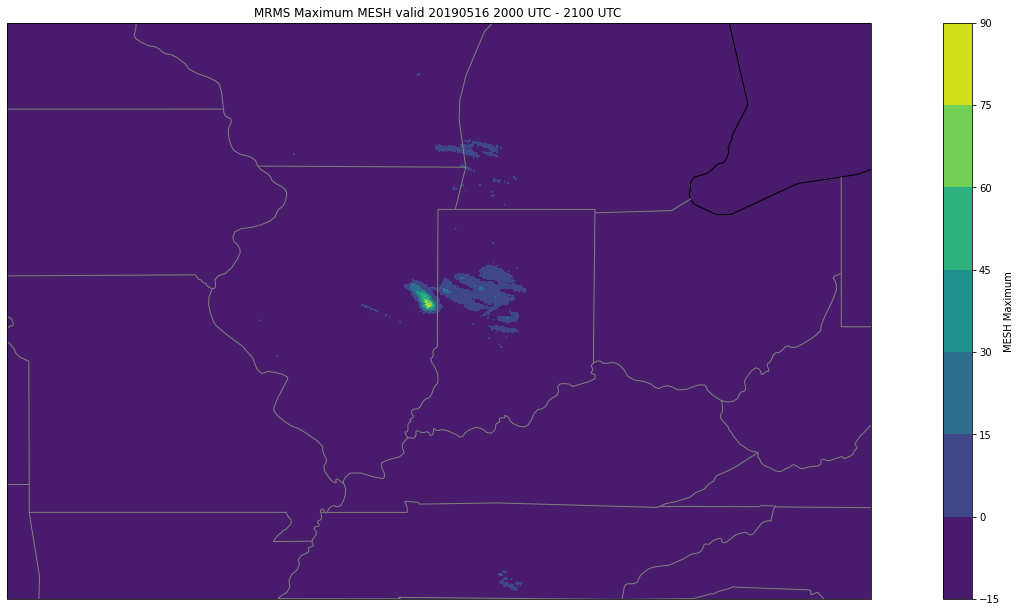

In [30]:
fig = plt.figure()
fig.set_size_inches(20,8)
ax = plt.axes([0.,0.,1,1], projection=ccrs.PlateCarree())
ax.set_extent(extent_midwest_zoom)

#The following lines plot things exactly the same way
plot = ax.contourf(mesh_60_max.isel(valid_time=0),extent=extent_data,transform=ccrs.PlateCarree())
#plot = ax.contourf(mesh_60_max.isel(valid_time=0).longitude.values,mesh_60_max.isel(valid_time=0).latitude.values,mesh_60_max.isel(valid_time=0).values,transform=ccrs.PlateCarree())

ax.add_feature(cp.feature.BORDERS)
ax.add_feature(cp.feature.COASTLINE)
ax.add_feature(states_provinces,edgecolor='gray')
colbar = plt.colorbar(plot,orientation='vertical')
colbar.set_label('MESH Maximum',rotation='vertical',fontsize='medium')
titlestr = 'MRMS Maximum MESH valid 20190516 2000 UTC - 2100 UTC '
ax.set_title(titlestr, fontsize='large')
plt.savefig("2019_05_16_figures/2000_2100_60min_Maximum_MESH.png",bbox_inches='tight')

#### Plot 60 Minute Minimum

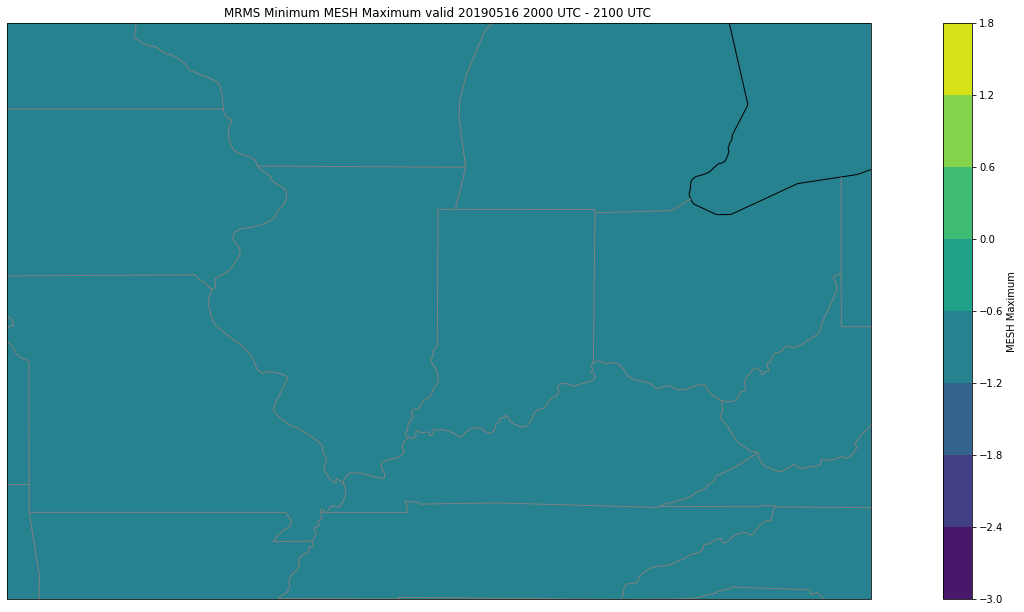

In [31]:
fig = plt.figure()
fig.set_size_inches(20,8)
ax = plt.axes([0.,0.,1,1], projection=ccrs.PlateCarree())
ax.set_extent(extent_midwest_zoom)

plot = ax.contourf(mesh_60_min.isel(valid_time=0),extent=extent_data,transform=ccrs.PlateCarree())

ax.add_feature(cp.feature.BORDERS)
ax.add_feature(cp.feature.COASTLINE)
ax.add_feature(states_provinces,edgecolor='gray')
colbar = plt.colorbar(plot,orientation='vertical')
colbar.set_label('MESH Maximum',rotation='vertical',fontsize='medium')
titlestr = 'MRMS Minimum MESH Maximum valid 20190516 2000 UTC - 2100 UTC '
ax.set_title(titlestr, fontsize='large')
plt.savefig("2019_05_16_figures/2000_2100_60min_Minimum_MESH.png",bbox_inches='tight')

#### Plot 60 Minute Average

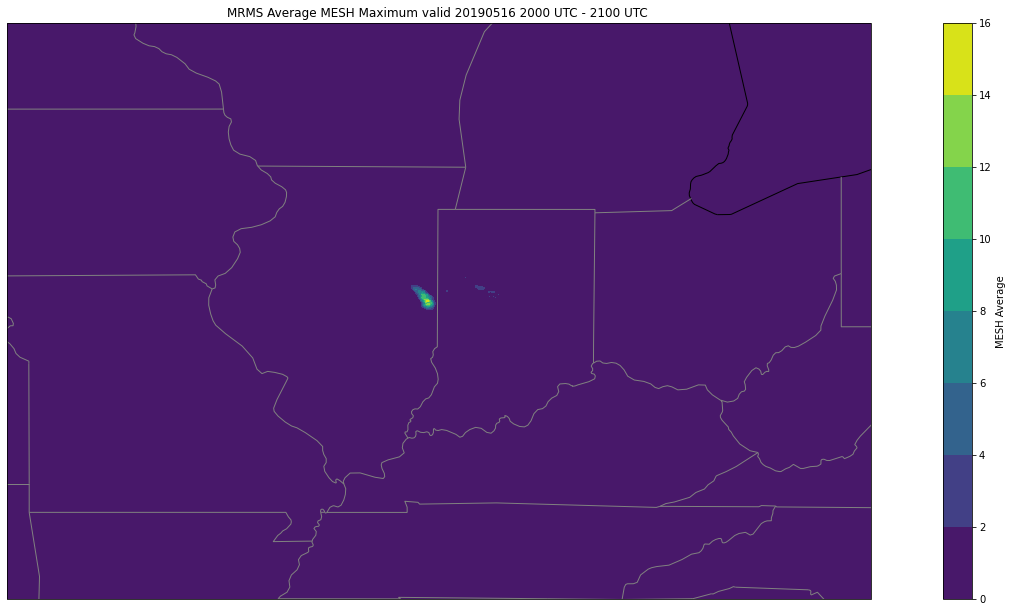

In [32]:
fig = plt.figure()
fig.set_size_inches(20,8)
ax = plt.axes([0.,0.,1,1], projection=ccrs.PlateCarree())
ax.set_extent(extent_midwest_zoom)


plot = ax.contourf((mesh_60_avg.isel(valid_time=0)>0)*mesh_60_avg.isel(valid_time=0),extent=extent_data,transform=ccrs.PlateCarree())


ax.add_feature(cp.feature.BORDERS)
ax.add_feature(cp.feature.COASTLINE)
ax.add_feature(states_provinces,edgecolor='gray')
colbar = plt.colorbar(plot,orientation='vertical')
colbar.set_label('MESH Average',rotation='vertical',fontsize='medium')
titlestr = 'MRMS Average MESH Maximum valid 20190516 2000 UTC - 2100 UTC '
ax.set_title(titlestr, fontsize='large')
plt.savefig("2019_05_16_figures/2000_2100_60min_Average_MESH.png",bbox_inches='tight')

#### Plot 60 Minute Total Sum

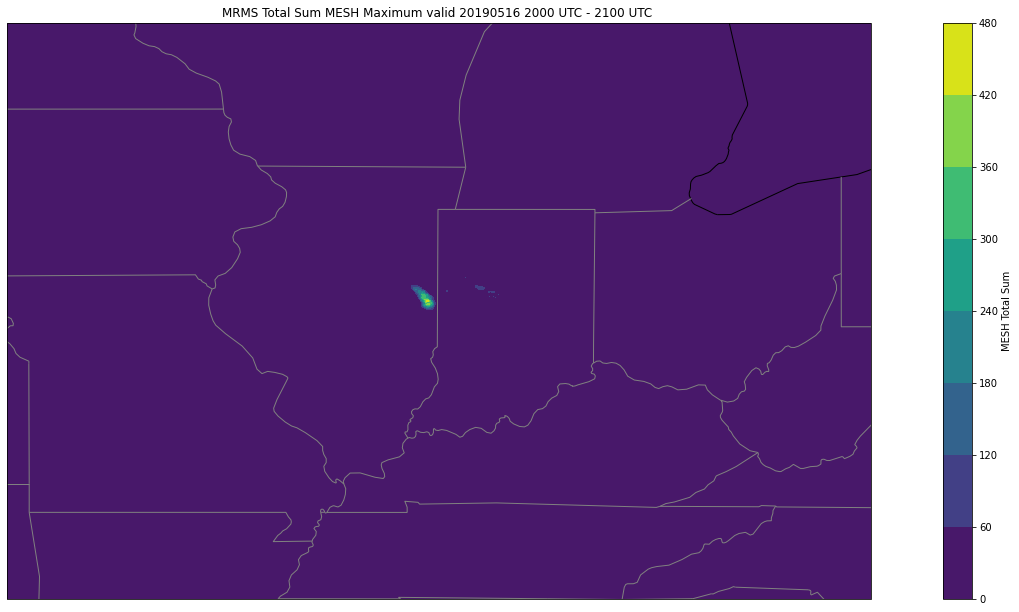

In [33]:
fig = plt.figure()
fig.set_size_inches(20,8)
ax = plt.axes([0.,0.,1,1], projection=ccrs.PlateCarree())
ax.set_extent(extent_midwest_zoom)


plot = ax.contourf((mesh_60_tot.isel(valid_time=0)>0)*mesh_60_tot.isel(valid_time=0), extent=extent_data, transform=ccrs.PlateCarree())


ax.add_feature(cp.feature.BORDERS)
ax.add_feature(cp.feature.COASTLINE)
ax.add_feature(states_provinces,edgecolor='gray')
colbar = plt.colorbar(plot,orientation='vertical')
colbar.set_label('MESH Total Sum',rotation='vertical',fontsize='medium')
titlestr = 'MRMS Total Sum MESH Maximum valid 20190516 2000 UTC - 2100 UTC '
ax.set_title(titlestr, fontsize='large')
plt.savefig("2019_05_16_figures/2000_2100_60min_Total_MESH.png",bbox_inches='tight')

#### Plot 60 Minute Boolean - Was there hail?

##### Maximum Hail Size > 0

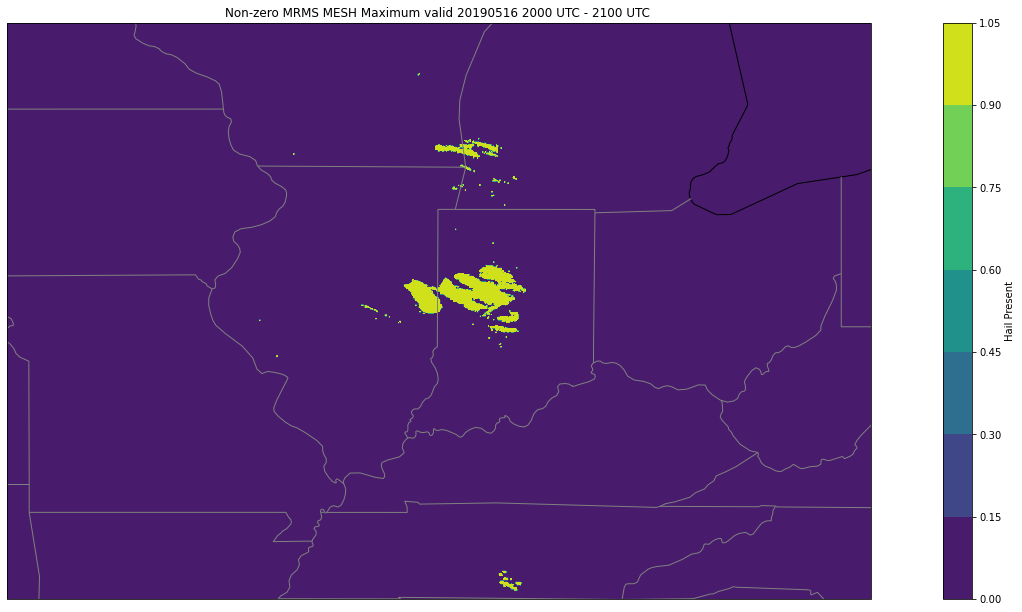

In [34]:
fig = plt.figure()
fig.set_size_inches(20,8)
ax = plt.axes([0.,0.,1,1], projection=ccrs.PlateCarree())
ax.set_extent(extent_midwest_zoom)


plot = ax.contourf(mesh_60_max.isel(valid_time=0)>0,extent=extent_data,transform=ccrs.PlateCarree())


ax.add_feature(cp.feature.BORDERS)
ax.add_feature(cp.feature.COASTLINE)
ax.add_feature(states_provinces,edgecolor='gray')
colbar = plt.colorbar(plot,orientation='vertical')
colbar.set_label('Hail Present',rotation='vertical',fontsize='medium')
titlestr = 'Non-zero MRMS MESH Maximum valid 20190516 2000 UTC - 2100 UTC '
ax.set_title(titlestr, fontsize='large')
plt.savefig("2019_05_16_figures/2000_2100_60min_Nonzero_Maximum_MESH.png",bbox_inches='tight')

##### Average Hail Size > 0

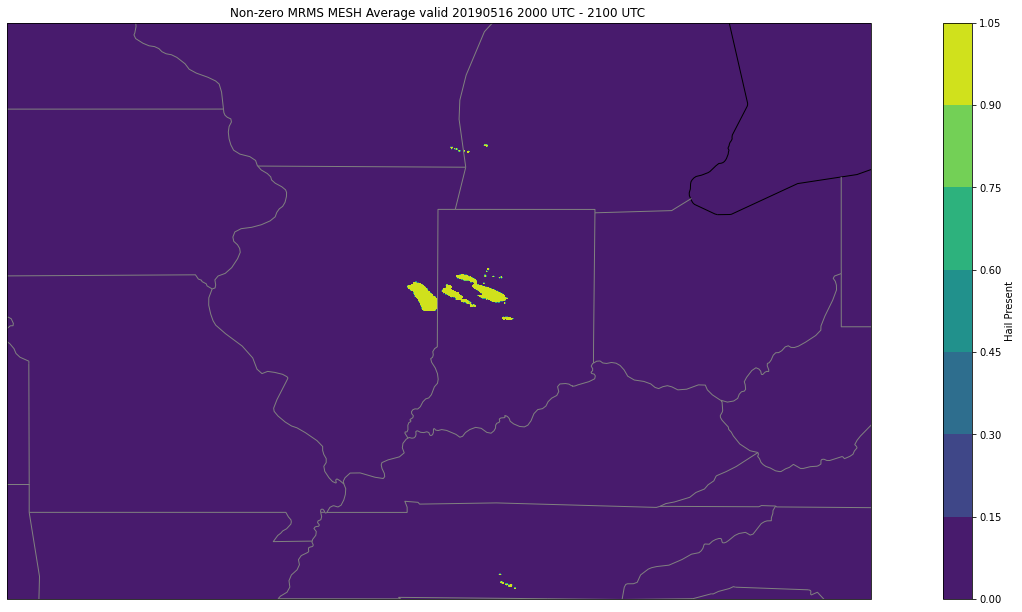

In [35]:
fig = plt.figure()
fig.set_size_inches(20,8)
ax = plt.axes([0.,0.,1,1], projection=ccrs.PlateCarree())
ax.set_extent(extent_midwest_zoom)


plot = ax.contourf(mesh_60_avg.isel(valid_time=0)>0,extent=extent_data,transform=ccrs.PlateCarree())


ax.add_feature(cp.feature.BORDERS)
ax.add_feature(cp.feature.COASTLINE)
ax.add_feature(states_provinces,edgecolor='gray')
colbar = plt.colorbar(plot,orientation='vertical')
colbar.set_label('Hail Present',rotation='vertical',fontsize='medium')
titlestr = 'Non-zero MRMS MESH Average valid 20190516 2000 UTC - 2100 UTC '
ax.set_title(titlestr, fontsize='large')
plt.savefig("2019_05_16_figures/2000_2100_60min_Nonzero_Average_MESH.png",bbox_inches='tight')

##### Total Hail Size > 0

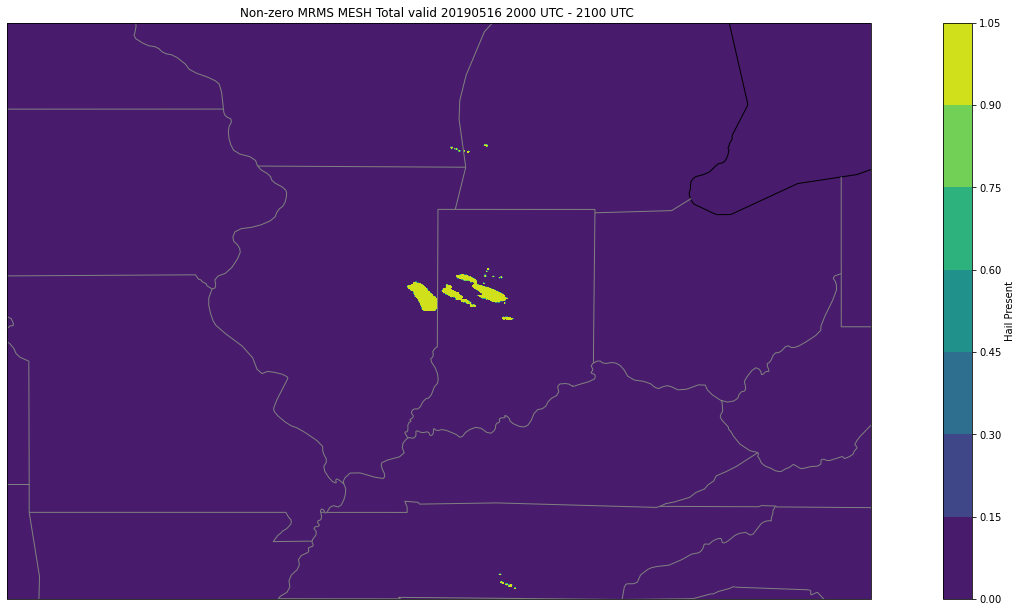

In [36]:
fig = plt.figure()
fig.set_size_inches(20,8)
ax = plt.axes([0.,0.,1,1], projection=ccrs.PlateCarree())
ax.set_extent(extent_midwest_zoom)


plot = ax.contourf(mesh_60_tot.isel(valid_time=0)>0,extent=extent_data,transform=ccrs.PlateCarree())


ax.add_feature(cp.feature.BORDERS)
ax.add_feature(cp.feature.COASTLINE)
ax.add_feature(states_provinces,edgecolor='gray')
colbar = plt.colorbar(plot,orientation='vertical')
colbar.set_label('Hail Present',rotation='vertical',fontsize='medium')
titlestr = 'Non-zero MRMS MESH Total valid 20190516 2000 UTC - 2100 UTC '
ax.set_title(titlestr, fontsize='large')
plt.savefig("2019_05_16_figures/2000_2100_60min_Nonzero_Total_MESH.png",bbox_inches='tight')

##### Minimum Hail Size > 0

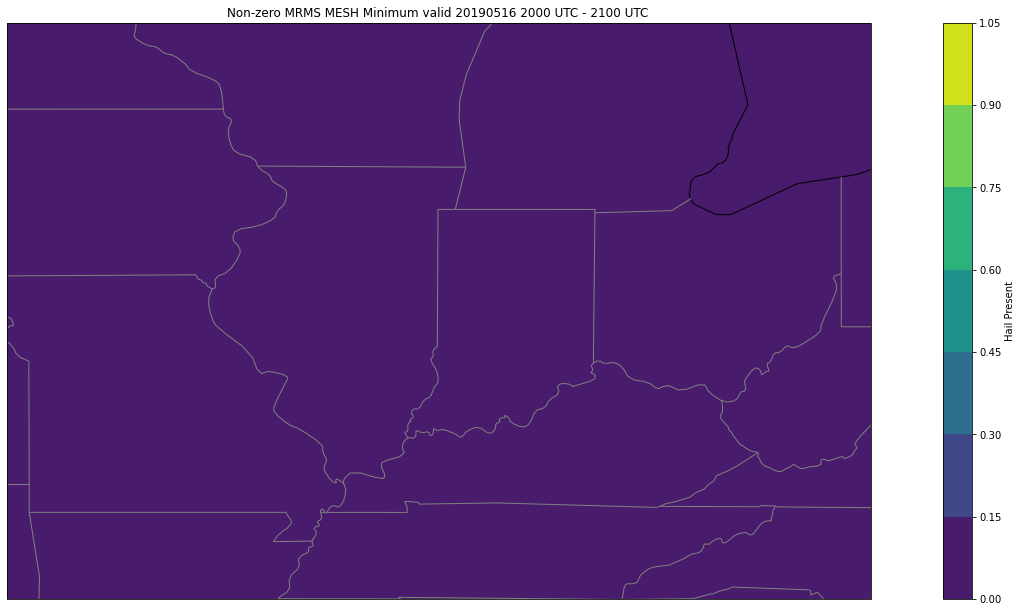

In [37]:
fig = plt.figure()
fig.set_size_inches(20,8)
ax = plt.axes([0.,0.,1,1], projection=ccrs.PlateCarree())
ax.set_extent(extent_midwest_zoom)


plot = ax.contourf(mesh_60_min.isel(valid_time=0)>0,extent=extent_data,transform=ccrs.PlateCarree())


ax.add_feature(cp.feature.BORDERS)
ax.add_feature(cp.feature.COASTLINE)
ax.add_feature(states_provinces,edgecolor='gray')
colbar = plt.colorbar(plot,orientation='vertical')
colbar.set_label('Hail Present',rotation='vertical',fontsize='medium')
titlestr = 'Non-zero MRMS MESH Minimum valid 20190516 2000 UTC - 2100 UTC '
ax.set_title(titlestr, fontsize='large')
plt.savefig("2019_05_16_figures/2000_2100_60min_Nonzero_Minimum_MESH.png",bbox_inches='tight')

## 30-min Aggregation

#### 30 Minute Maximum

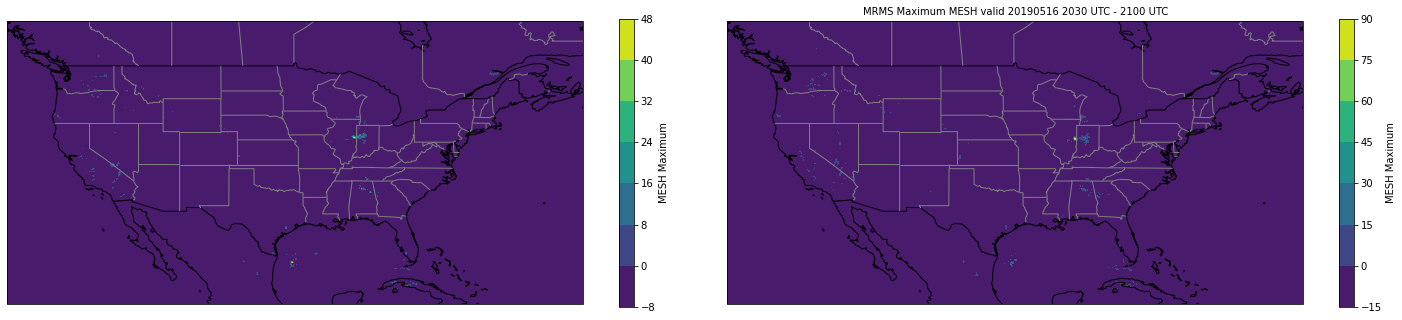

In [47]:
plot_num = 2
fig = plt.figure()
ax = []
fig.set_size_inches(20,8)
for i in range(plot_num):
    ax.append(plt.axes([0.0 + i/plot_num,0.0,1/plot_num,1/plot_num], projection=ccrs.PlateCarree()))
    ax[i].set_extent(extent_us_zoom)

for i in range(plot_num):
    plot = ax[i].contourf(mesh_30_max.isel(valid_time=i),extent=extent_data,transform=ccrs.PlateCarree())
    ax[i].add_feature(cp.feature.BORDERS)
    ax[i].add_feature(cp.feature.COASTLINE)
    ax[i].add_feature(states_provinces,edgecolor='gray')
    colbar = plt.colorbar(plot,orientation='vertical',ax=ax[i])
    colbar.set_label('MESH Maximum',rotation='vertical',fontsize='medium')
    titleset = 'MRMS Maximum MESH valid 20190516 ' + timestring_30[i]
    plt.title(titleset,fontsize='medium')

#### 30 Minute Average

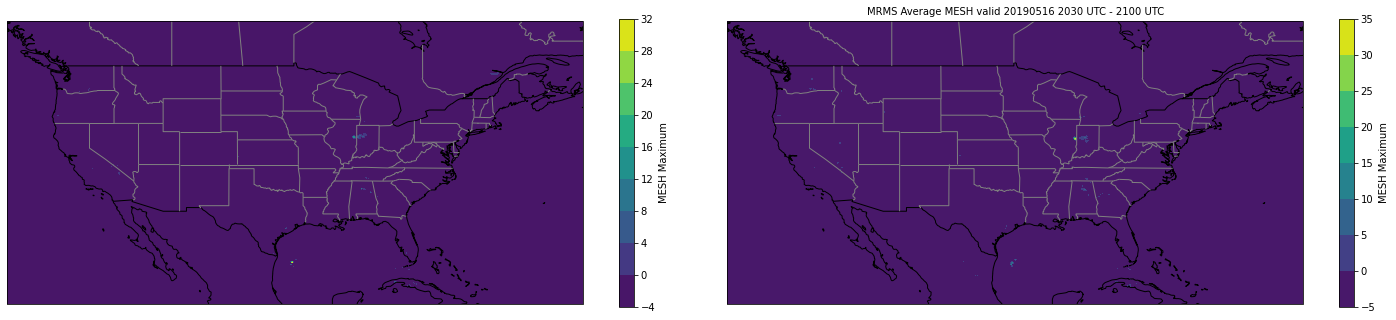

In [48]:
plot_num = 2
fig = plt.figure()
ax = []
fig.set_size_inches(20,8)
for i in range(plot_num):
    ax.append(plt.axes([0.0 + i/plot_num,0.0,1/plot_num,1/plot_num], projection=ccrs.PlateCarree()))
    ax[i].set_extent(extent_us_zoom)

for i in range(plot_num):
    plot = ax[i].contourf(mesh_30_avg.isel(valid_time=i),extent=extent_data,transform=ccrs.PlateCarree())
    ax[i].add_feature(cp.feature.BORDERS)
    ax[i].add_feature(cp.feature.COASTLINE)
    ax[i].add_feature(states_provinces,edgecolor='gray')
    colbar = plt.colorbar(plot,orientation='vertical',ax=ax[i])
    colbar.set_label('MESH Maximum',rotation='vertical',fontsize='medium')
    titleset = 'MRMS Average MESH valid 20190516 ' + timestring_30[i]
    plt.title(titleset,fontsize='medium')

#### 30 Minute Total Sum

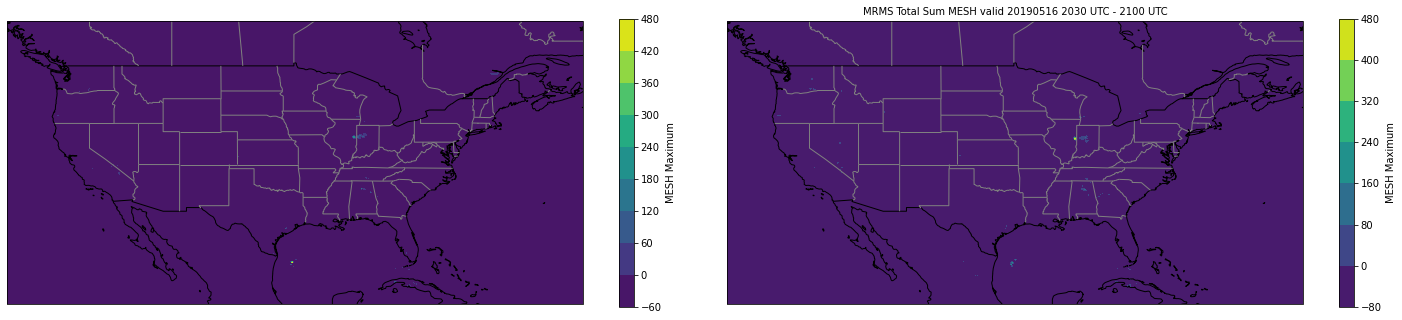

In [49]:
plot_num = 2
fig = plt.figure()
ax = []
fig.set_size_inches(20,8)
for i in range(plot_num):
    ax.append(plt.axes([0.0 + i/plot_num,0.0,1/plot_num,1/plot_num], projection=ccrs.PlateCarree()))
    ax[i].set_extent(extent_us_zoom)

for i in range(plot_num):
    plot = ax[i].contourf(mesh_30_tot.isel(valid_time=i),extent=extent_data,transform=ccrs.PlateCarree())
    ax[i].add_feature(cp.feature.BORDERS)
    ax[i].add_feature(cp.feature.COASTLINE)
    ax[i].add_feature(states_provinces,edgecolor='gray')
    colbar = plt.colorbar(plot,orientation='vertical',ax=ax[i])
    colbar.set_label('MESH Maximum',rotation='vertical',fontsize='medium')
    titleset = 'MRMS Total Sum MESH valid 20190516 ' + timestring_30[i]
    plt.title(titleset,fontsize='medium')

#### 30 Minute Boolean

##### Maximum Hail Sizes > 0

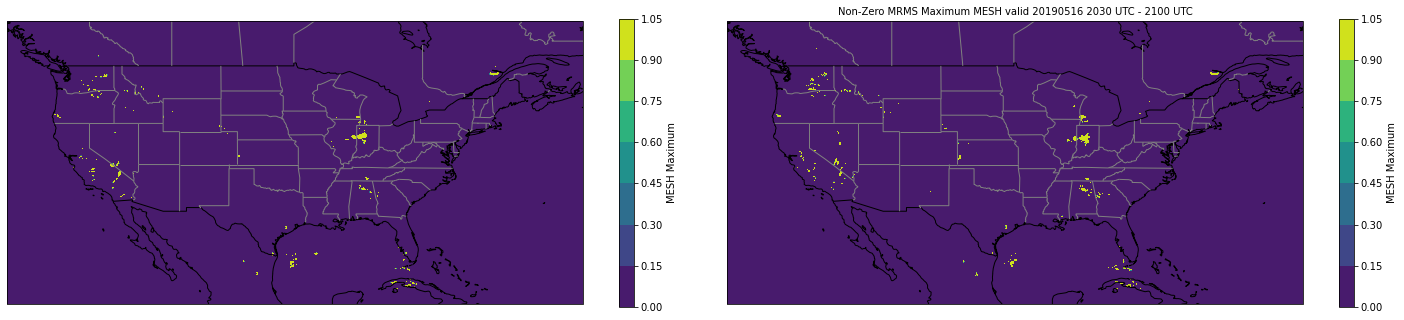

In [50]:
plot_num = 2
fig = plt.figure()
ax = []
fig.set_size_inches(20,8)
for i in range(plot_num):
    ax.append(plt.axes([0.0 + i/plot_num,0.0,1/plot_num,1/plot_num], projection=ccrs.PlateCarree()))
    ax[i].set_extent(extent_us_zoom)

for i in range(plot_num):
    plot = ax[i].contourf(mesh_30_max.isel(valid_time=i) > 0,extent=extent_data,transform=ccrs.PlateCarree())
    ax[i].add_feature(cp.feature.BORDERS)
    ax[i].add_feature(cp.feature.COASTLINE)
    ax[i].add_feature(states_provinces,edgecolor='gray')
    colbar = plt.colorbar(plot,orientation='vertical',ax=ax[i])
    colbar.set_label('MESH Maximum',rotation='vertical',fontsize='medium')
    titleset = 'Non-Zero MRMS Maximum MESH valid 20190516 ' + timestring_30[i]
    plt.title(titleset,fontsize='medium')

##### Average Hail Sizes > 0

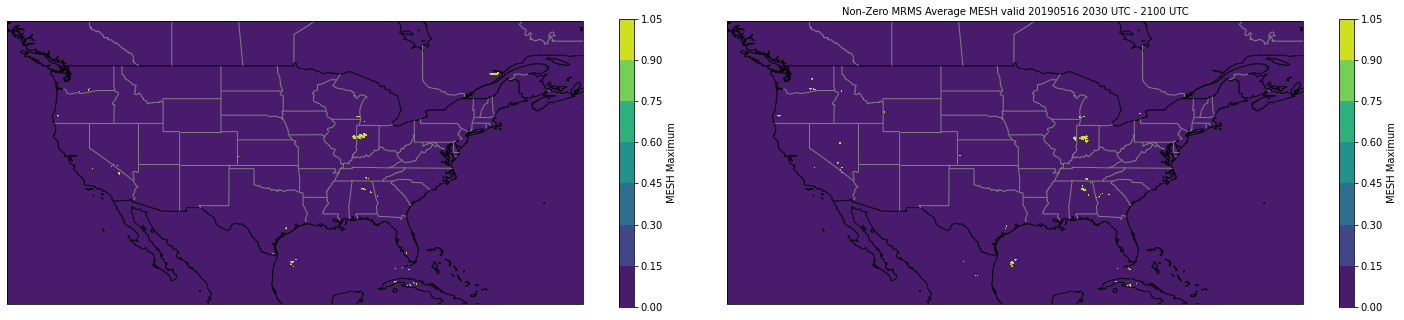

In [51]:
plot_num = 2
fig = plt.figure()
ax = []
fig.set_size_inches(20,8)
for i in range(plot_num):
    ax.append(plt.axes([0.0 + i/plot_num,0.0,1/plot_num,1/plot_num], projection=ccrs.PlateCarree()))
    ax[i].set_extent(extent_us_zoom)

for i in range(plot_num):
    plot = ax[i].contourf(mesh_30_avg.isel(valid_time=i) > 0,extent=extent_data,transform=ccrs.PlateCarree())
    ax[i].add_feature(cp.feature.BORDERS)
    ax[i].add_feature(cp.feature.COASTLINE)
    ax[i].add_feature(states_provinces,edgecolor='gray')
    colbar = plt.colorbar(plot,orientation='vertical',ax=ax[i])
    colbar.set_label('MESH Maximum',rotation='vertical',fontsize='medium')
    titleset = 'Non-Zero MRMS Average MESH valid 20190516 ' + timestring_30[i]
    plt.title(titleset,fontsize='medium')

##### Total Hail > 0

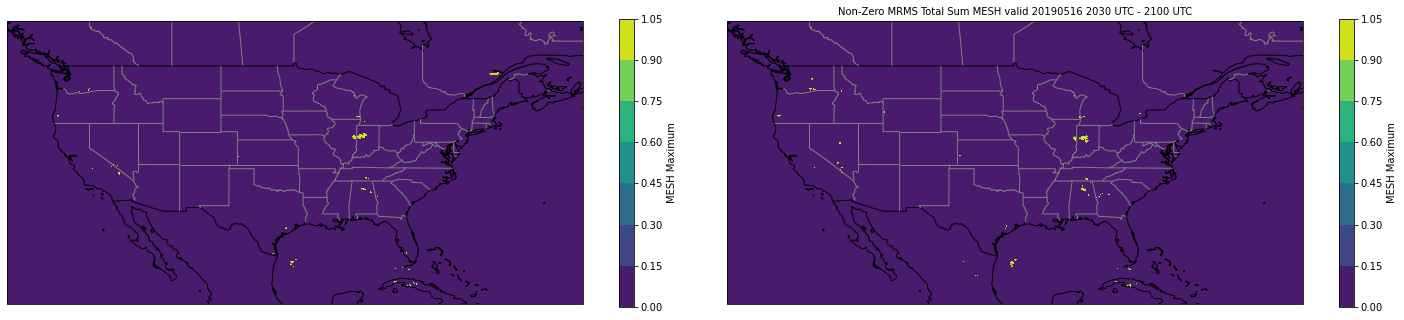

In [52]:
plot_num = 2
fig = plt.figure()
ax = []
fig.set_size_inches(20,8)
for i in range(plot_num):
    ax.append(plt.axes([0.0 + i/plot_num,0.0,1/plot_num,1/plot_num], projection=ccrs.PlateCarree()))
    ax[i].set_extent(extent_us_zoom)

for i in range(plot_num):
    plot = ax[i].contourf(mesh_30_tot.isel(valid_time=i) > 0,extent=extent_data,transform=ccrs.PlateCarree())
    ax[i].add_feature(cp.feature.BORDERS)
    ax[i].add_feature(cp.feature.COASTLINE)
    ax[i].add_feature(states_provinces,edgecolor='gray')
    colbar = plt.colorbar(plot,orientation='vertical',ax=ax[i])
    colbar.set_label('MESH Maximum',rotation='vertical',fontsize='medium')
    titleset = 'Non-Zero MRMS Total Sum MESH valid 20190516 ' + timestring_30[i]
    plt.title(titleset,fontsize='medium')

## 10 Minute Aggregation

#### 10 Minute Maximum

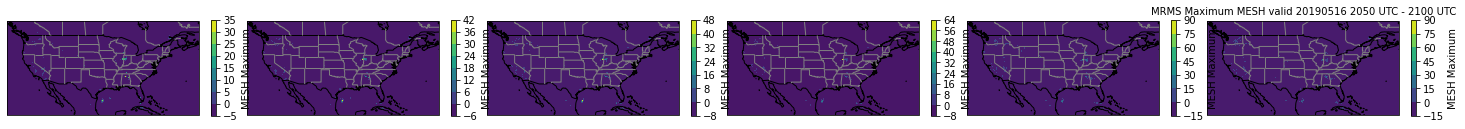

In [9]:
plot_num = 6
fig = plt.figure()
ax = []
fig.set_size_inches(20,8)
for i in range(plot_num):
    ax.append(plt.axes([0.0 + i/plot_num,0.0,1/plot_num,1/plot_num], projection=ccrs.PlateCarree()))
    ax[i].set_extent(extent_us_zoom)

for i in range(plot_num):
    plot = ax[i].contourf(mesh_10_max.isel(valid_time=i),extent=extent_data,transform=ccrs.PlateCarree())
    ax[i].add_feature(cp.feature.BORDERS)
    ax[i].add_feature(cp.feature.COASTLINE)
    ax[i].add_feature(states_provinces,edgecolor='gray')
    colbar = plt.colorbar(plot,orientation='vertical',ax=ax[i])
    colbar.set_label('MESH Maximum',rotation='vertical',fontsize='medium')
    titleset = 'MRMS Maximum MESH valid 20190516 ' + timestring_10[i]
    plt.title(titleset,fontsize='medium')